## Predicting House Prices in King County, USA
------

Case Study: https://www.kaggle.com/harlfoxem/housesalesprediction

Using various regression methods to predict house prices in King County, USA.

1. Simple Linear Regression
2. Polynomial Regression


### Reading the dataset and importing modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import warnings

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

warnings.filterwarnings('ignore')

evaluation = pd.DataFrame({'Model': [],
                           'Details': [],
                           'Root Mean Squared Error': [],
                           'R-squared (training)': [],
                           'Adjusted R-squared (train)': [],
                           'R-squared (test)': [],
                           'Adjusted R-squared (test)': [],
                           '5-Fold Cross Validation': []
                        })

df = pd.read_csv("../DATA/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.isnull().sum() # no NA values

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


### Defining a function for adjusted $R^2$
R-squared increases when the number of features increase, and so because of this it would probably be better to use a more robust evaluator, such as Adjusted R-squared. 

In [5]:
from sklearn.metrics import r2_score

def adjusted_rsquared(r2, p, n):
    return 1 - (1 - r2) * ((n-1) / (n-p-1))

## Simple Linear Regression

Simple Linear Regression is modelling the linear relationship between a response and one explanatory variable. 

I want to predict the house prices, so the response is `price`, and the explanatory variable will be the most important feature, which can be determined by inspecting a correlation matrix.

Therefore, the explanatory variable chosen will be `sqft_living`

In [36]:
df.corr()['price']

id              -0.016772
price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
waterfront       0.266398
view             0.397370
condition        0.036056
grade            0.667951
sqft_above       0.605368
sqft_basement    0.323799
yr_built         0.053953
yr_renovated     0.126424
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
Name: price, dtype: float64

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# split data into training and testing sets
train, test = train_test_split(df, test_size=0.2)

X_train, y_train = np.array(train['sqft_living']).reshape(-1,1), train['price']
X_test, y_test = np.array(test['sqft_living']).reshape(-1, 1), test['price']

# model
lm = LinearRegression()
lm.fit(X_train,y_train)
pred = lm.predict(X_test)

# metrics
rmse = round(np.sqrt(mean_squared_error(y_test, pred)), 3)
r_sq_train = round(lm.score(X_train, y_train), 3)
r_sq_test = round(lm.score(X_test, y_test), 3)
cv = round(cross_val_score(lm, X_train, y_train, cv=5).mean(), 3)

print(f"Intercept: {round(lm.intercept_, 3)}")
print(f"Coefficients: {lm.coef_}")

# add to evaluation table
r = evaluation.shape[0]
evaluation.loc[r] = ['Simple Linear Regression', '-', rmse, r_sq_train, '-', r_sq_test, '-', cv]

evaluation

Intercept: -43533.869
Coefficients: [281.08503854]


,Model,Details,Root Mean Squared Error,R-squared (training),Adjusted R-squared (train),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,-,256987.348,0.489,-,0.506,-,0.489


Therefore, using the intercept and coefficient values generated by the model, we can manually estimate house prices. The equation we use for estimations can be formulated as:

$$\text{Price}=279.787*\text{sqft living}-41135.595$$

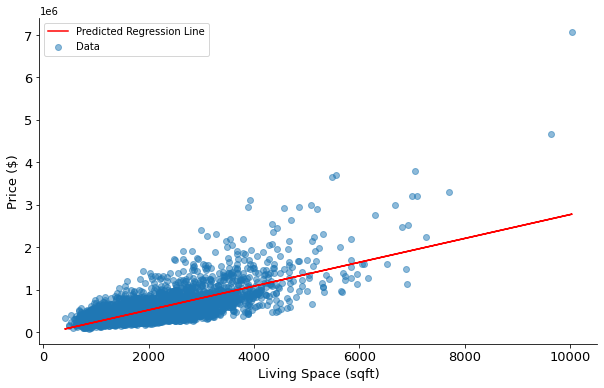

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(X_test, lm.predict(X_test), c='red', label='Predicted Regression Line')
plt.scatter(X_test, y_test, alpha=0.5, label='Data')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Living Space (sqft)', fontsize=13)
plt.ylabel('Price ($)', fontsize=13)
plt.legend()

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

## Visualising and Examining Data

The data that we are presented with is not very large (ie. low dimensionality), so we have the option to plot most of the features and recieve useful analytic results.

In [9]:
df.columns # selecting only relevant columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

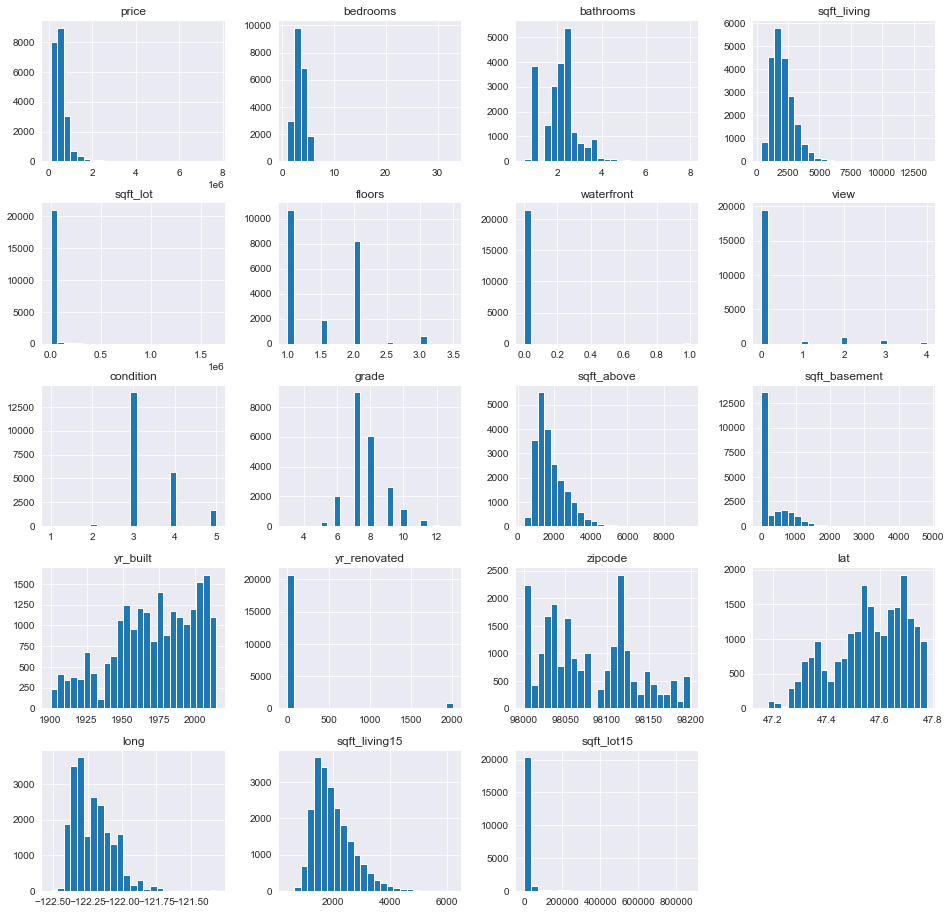

In [10]:
df1 = df[['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]

sns.set_style("dark")
h = df1.hist(figsize=(16, 16), bins=25)
sns.despine(left=True, bottom=True)

To determine bedrooms, floors or bathrooms/bedrooms vs price, we can use a **boxplot** as we have numerical data, but aren't necessarily continuous data.

Outliers won't be removed as 1) it will be time consuming and 2) in reality, luxury houses can have those properties, so doesn't seem entirely infeasible..

In [11]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


[Text(0.5, 0, 'Bathrooms'), Text(0, 0.5, 'Price')]

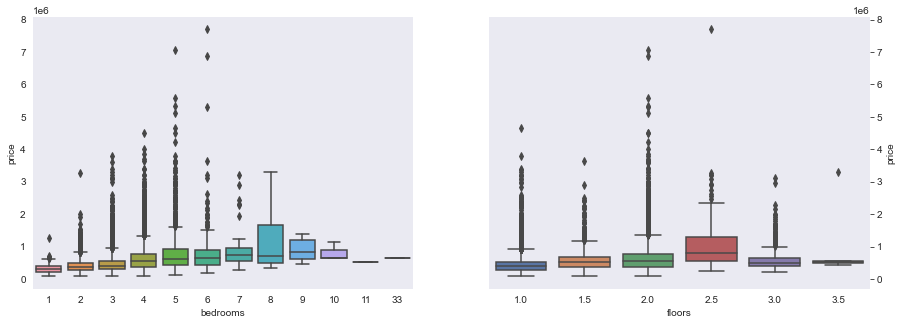

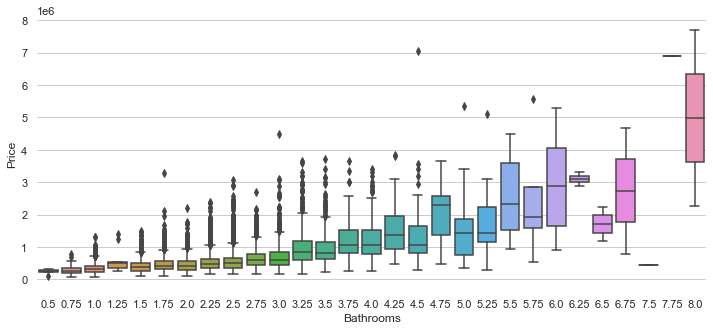

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
sns.set(style = 'whitegrid')
sns.boxplot(data=df, x='bedrooms', y='price', ax=ax[0])
sns.boxplot(data=df, x='floors', y='price', ax=ax[1])
sns.despine(left=True, bottom=True)
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position('right')

fig, ax = plt.subplots(figsize=(12,5))
sns.despine(left=True, bottom=True)
sns.boxplot(data=df, x='bathrooms', y='price', ax=ax)
ax.set(xlabel='Bathrooms', ylabel='Price')

We can generate 3D plots to determine the relationship between features, other than just price.

[(0.0, 250000.0)]

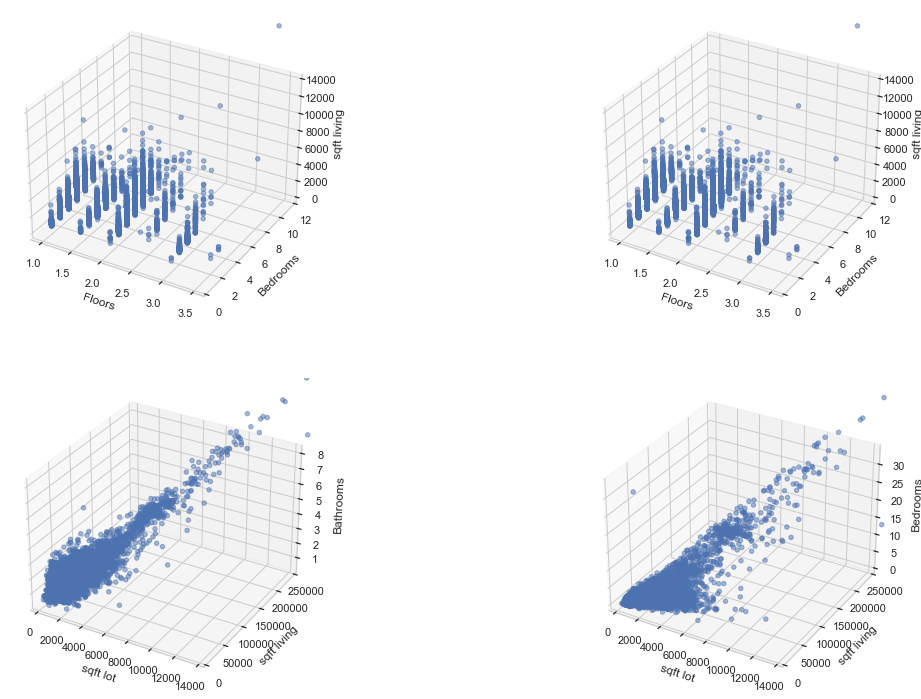

In [13]:
fig=plt.figure(figsize=(19,12.5))

ax = fig.add_subplot(2,2,1,projection='3d')
ax.scatter(df['floors'], df['bedrooms'], df['sqft_living'], alpha=.5)
ax.set(xlabel='Floors', ylabel='Bedrooms', zlabel='sqft living')
ax.set(ylim=[0,12])

ax = fig.add_subplot(2,2,2,projection='3d')
ax.scatter(df['floors'], df['bedrooms'], df['sqft_living'], alpha=.5)
ax.set(xlabel='Floors', ylabel='Bedrooms', zlabel='sqft living')
ax.set(ylim=[0,12])

ax = fig.add_subplot(2,2,3,projection='3d')
ax.scatter(df['sqft_living'], df['sqft_lot'], df['bathrooms'], alpha=.5)
ax.set(xlabel='sqft lot', ylabel='sqft living', zlabel='Bathrooms')
ax.set(ylim=[0,250000])

ax = fig.add_subplot(2,2,4,projection='3d')
ax.scatter(df['sqft_living'], df['sqft_lot'], df['bedrooms'], alpha=.5)
ax.set(xlabel='sqft lot', ylabel='sqft living', zlabel='Bedrooms')
ax.set(ylim=[0,250000])

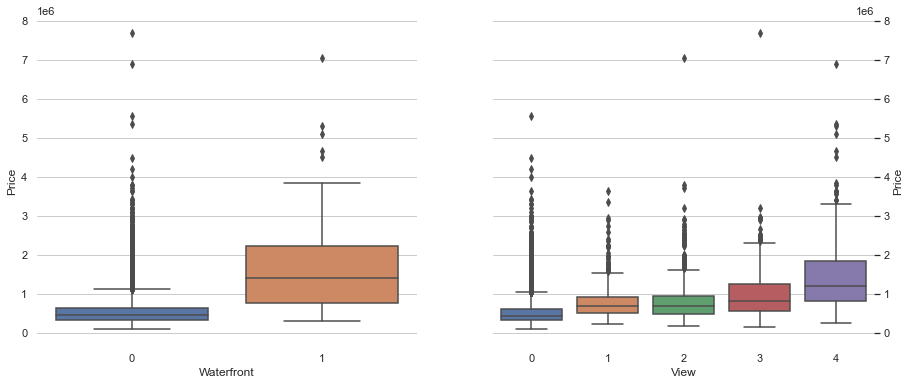

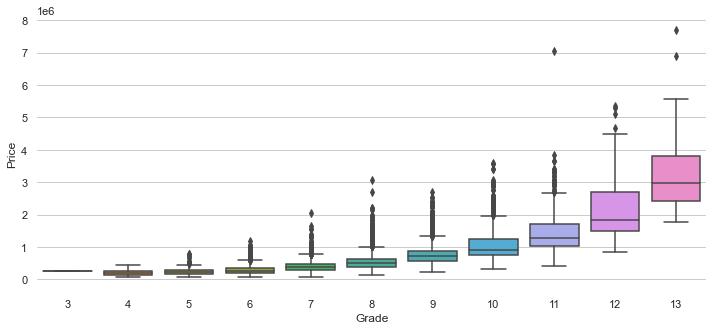

In [14]:
fig, ax = plt.subplots(1,2,figsize=(15,6))
plot1 = sns.boxplot(data=df, x='waterfront', y='price', ax=ax[0])
plot1.set(xlabel='Waterfront', ylabel='Price')

plot2 = sns.boxplot(data=df, x='view', y='price', ax=ax[1])
plot2.set(xlabel='View', ylabel='Price')

plot2.yaxis.tick_right()
plot2.yaxis.set_label_position('right')

sns.despine(left=True, bottom=True)

fig = plt.figure(figsize=(12,5))
sns.boxplot(data=df, x='grade', y='price').set(xlabel='Grade', ylabel='Price')

sns.despine(left=True, bottom=True)

From the above plots, we can begin to argue that houses with a higher grading are priced higher, aswell as that houses on waterfronts are generally more expensive, but these relationships require further and more robust investigation.

[Text(0.5, 0, 'View'), Text(0.5, 0.5, 'Grade'), Text(0.5, 0, 'Year Built')]

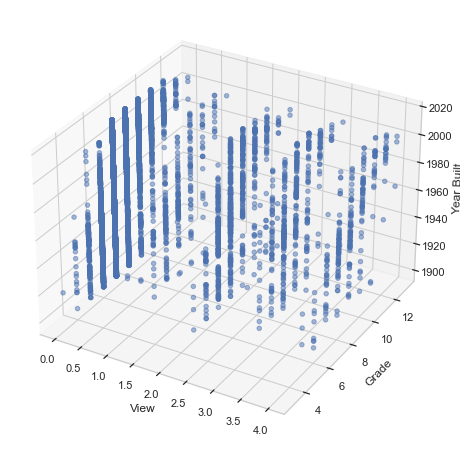

In [15]:
fx = plt.figure(figsize=(12, 8))
ax=fx.add_subplot(1,1,1,projection='3d')
ax.scatter(train['view'], train['grade'], train['yr_built'], alpha=.5)
ax.set(xlabel='View', ylabel='Grade', zlabel='Year Built')

The above plot shows that newer houses have better grades, but we can't say much about the change in view.

## Correlation Matrix between Explanatory Variables

Having too many features in a model is not always a good thing as it may cause overfitting and worser results when we make predictions using unseen data. Therefore, if a feature does not improve your model's performance (ie. prediction power), then not adding it may be a better choice.

Anothing important thing to consider is correlation. If there is very high correlation between two features, keeping both of them is not a good idea as most of the time as it can subject the model to overfitting.

For instance, should there be overfitting, the features `sqft_living` and `sqft_above` should be removed due to high correlation.

In [39]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.002727,0.011536,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.016925,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.266398,0.397370,0.036056,0.667951,0.605368,0.323799,0.053953,0.126424,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.002727,0.266398,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781
view,0.011536,0.397370,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


In [54]:
df.columns # id and date provide no relevant information

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Text(0.5, 1.0, 'Pearson Correlation Matrix')

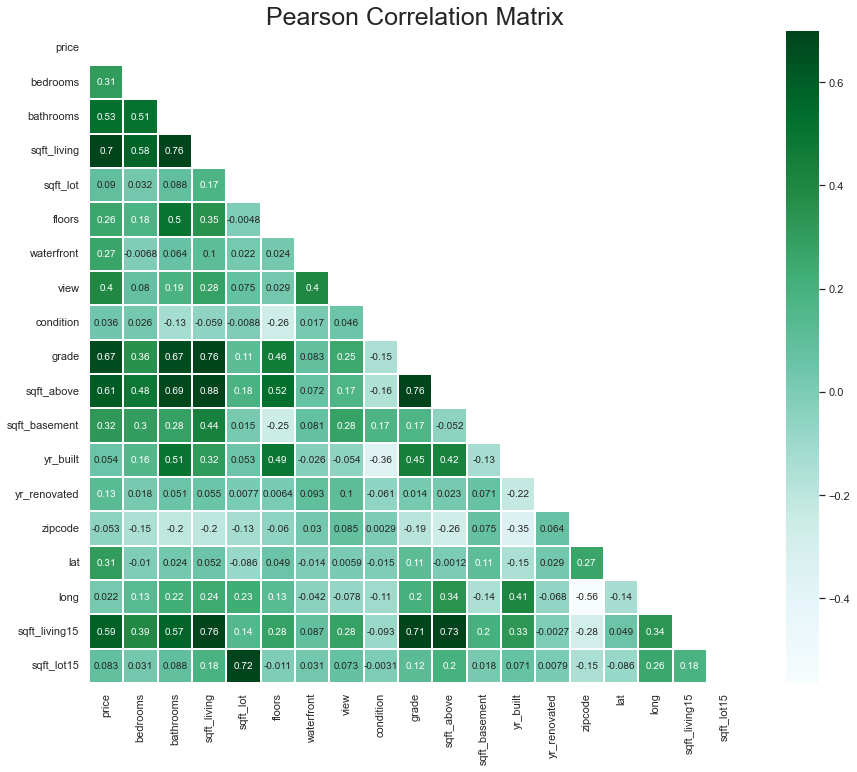

In [71]:
features = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

mask = np.zeros_like(df[features].corr())
mask[np.triu_indices_from(mask)] = 1 # selects upper triangular

plt.figure(figsize=(16,12))
sns.heatmap(df[features].corr(), cmap='BuGn', vmax=0.7, annot=True, square=True, 
            mask=mask, linecolor='white', linewidth=0.2, annot_kws={"size": 10})

plt.title('Pearson Correlation Matrix', fontsize=25)

In [65]:
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.

In [20]:
df.corr()['price']

id              -0.016772
price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
waterfront       0.266398
view             0.397370
condition        0.036056
grade            0.667951
sqft_above       0.605368
sqft_basement    0.323799
yr_built         0.053953
yr_renovated     0.126424
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
Name: price, dtype: float64

### Exploring highly correlated features

<AxesSubplot: xlabel='price', ylabel='sqft_living'>

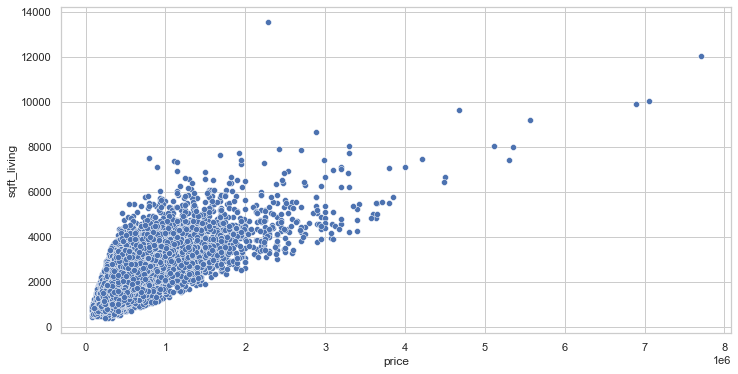

In [21]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='price', y='sqft_living') # linear relationship

<AxesSubplot: xlabel='bedrooms', ylabel='price'>

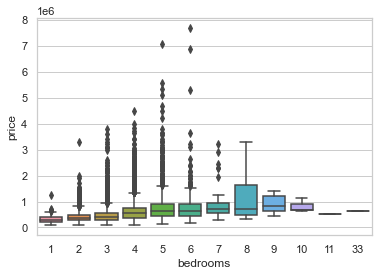

In [22]:
sns.boxplot(data=df, x='bedrooms', y='price') # distribution of prices per bedrooms

<AxesSubplot: xlabel='price', ylabel='long'>

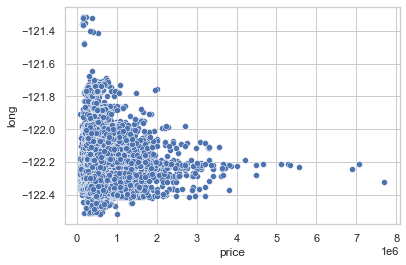

In [23]:
sns.scatterplot(data=df, x='price', y='long')

<AxesSubplot: xlabel='price', ylabel='lat'>

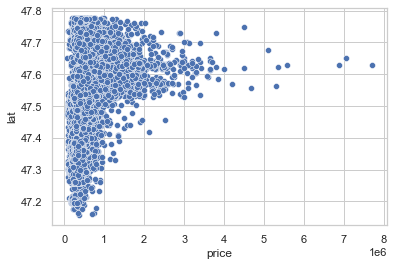

In [24]:
sns.scatterplot(data=df, x='price', y='lat')

#### Visualisation of 5 most expensive and 5 cheapest houses in King County, USA

In [25]:
df_copy = df.copy()

locations = df_copy[['lat', 'long']]

def generateMap(default_location=[df_copy.lat[0], df_copy.long[0]], scale=True):
    map = folium.Map(location=default_location, control_scale=scale)
    return map

map = generateMap()
# plot top 5 expensive
for _ in range(6):
    min_val, max_val = df_copy.iloc[df_copy.price.idxmin()], df_copy.iloc[df_copy.price.idxmax()]
    folium.Marker([min_val.lat, min_val.long], 
              popup=f"Price (Expensive): ${max_val.price}",
              icon=folium.Icon(color='blue')).add_to(map)
    
    folium.Marker([max_val.lat, max_val.long], 
              popup=f"Price (Cheapest): ${max_val.price}",
              icon=folium.Icon(color='red')).add_to(map)
    
    df_copy = df_copy.drop(df_copy.index[df_copy.price.idxmax()])

In [26]:
map

Are waterfront houses more expensive than non-waterfront houses?

<AxesSubplot: xlabel='waterfront', ylabel='price'>

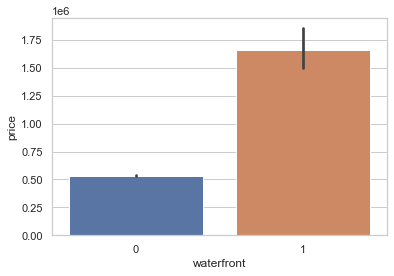

In [27]:
sns.barplot(data=df, x='waterfront', y='price')

In [28]:
df_waterfront = df[df.waterfront == 1]

top_vals = df_waterfront.sort_values(by=['price'], ascending=False)[:10]

waterfront_map = generateMap()

color = ''

for i, n in df_waterfront.iterrows():
    if n.price in top_vals.price.values:
        color = 'red'
    else:
        color = 'blue'
        
    folium.Marker([n.lat, n.long], icon=folium.Icon(color=color), tooltip=f"Price: {n.price}").add_to(waterfront_map)


In [29]:
top_vals.price

3910     7060000.0
1313     5300000.0
1162     5110000.0
8085     4670000.0
2624     4500000.0
2083     3850000.0
6502     3650000.0
15241    3640000.0
2862     3600000.0
21560    3570000.0
Name: price, dtype: float64

In [30]:
waterfront_map

### Feature Engineering

In [31]:
# import datetime as dt

# df['date'] = pd.to_datetime(df['date'])

# df['year'] = df['date'].dt.year
# df['month'] = df['date'].dt.month

In [32]:
# df = df.drop('id', axis=1)